In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv('weatherHistory.csv')
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
most_frequent_precip = df["Precip Type"].mode()[0]

df["Precip Type"] = df["Precip Type"].fillna(most_frequent_precip)


Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [11]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               96453 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [17]:
# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number])

# Mean, median, mode for numeric columns
mean = numeric_cols.mean()
median = numeric_cols.median()
mode = numeric_cols.mode().iloc[0]  # Mode for numeric columns
std_dev = numeric_cols.std()
variance = numeric_cols.var()

# Min, max, and range
min_val = numeric_cols.min()
max_val = numeric_cols.max()
range_val = max_val - min_val

# Percentiles
percentiles = numeric_cols.quantile([0.25, 0.5, 0.75])

In [21]:
# Printing the statistics

print("Descriptive Statistics:\n")

# Mean values
print("Mean:")
print(f" - Temperature (C):            {mean['Temperature (C)']:.2f}")
print(f" - Apparent Temperature (C):   {mean['Apparent Temperature (C)']:.2f}")
print(f" - Humidity:                   {mean['Humidity']:.2f}")
print(f" - Wind Speed (km/h):          {mean['Wind Speed (km/h)']:.2f}")
print(f" - Wind Bearing (degrees):     {mean['Wind Bearing (degrees)']:.2f}")
print(f" - Visibility (km):            {mean['Visibility (km)']:.2f}")
print(f" - Loud Cover:                 {mean['Loud Cover']:.2f}")
print(f" - Pressure (millibars):       {mean['Pressure (millibars)']:.2f}\n")

# Median values
print("Median:")
print(f" - Temperature (C):            {median['Temperature (C)']:.2f}")
print(f" - Apparent Temperature (C):   {median['Apparent Temperature (C)']:.2f}")
print(f" - Humidity:                   {median['Humidity']:.2f}")
print(f" - Wind Speed (km/h):          {median['Wind Speed (km/h)']:.2f}")
print(f" - Wind Bearing (degrees):     {median['Wind Bearing (degrees)']:.2f}")
print(f" - Visibility (km):            {median['Visibility (km)']:.2f}")
print(f" - Loud Cover:                 {median['Loud Cover']:.2f}")
print(f" - Pressure (millibars):       {median['Pressure (millibars)']:.2f}\n")

# Mode values
print("Mode:")
print(f" - Temperature (C):            {mode['Temperature (C)']:.2f}")
print(f" - Apparent Temperature (C):   {mode['Apparent Temperature (C)']:.2f}")
print(f" - Humidity:                   {mode['Humidity']:.2f}")
print(f" - Wind Speed (km/h):          {mode['Wind Speed (km/h)']:.2f}")
print(f" - Wind Bearing (degrees):     {mode['Wind Bearing (degrees)']:.2f}")
print(f" - Visibility (km):            {mode['Visibility (km)']:.2f}")
print(f" - Loud Cover:                 {mode['Loud Cover']:.2f}")
print(f" - Pressure (millibars):       {mode['Pressure (millibars)']:.2f}\n")

# Percentiles values
print("Percentiles for all numerical columns:\n")
for col in numeric_cols.columns:
    print(f"{col}:")
    print(f" - 25th Percentile:      {percentiles.loc[0.25, col]:.2f}")
    print(f" - 50th Percentile:      {percentiles.loc[0.50, col]:.2f}")
    print(f" - 75th Percentile:      {percentiles.loc[0.75, col]:.2f}")
    print("\n")


Descriptive Statistics:

Mean:
 - Temperature (C):            11.93
 - Apparent Temperature (C):   10.86
 - Humidity:                   0.73
 - Wind Speed (km/h):          10.81
 - Wind Bearing (degrees):     187.51
 - Visibility (km):            10.35
 - Loud Cover:                 0.00
 - Pressure (millibars):       1003.24

Median:
 - Temperature (C):            12.00
 - Apparent Temperature (C):   12.00
 - Humidity:                   0.78
 - Wind Speed (km/h):          9.97
 - Wind Bearing (degrees):     180.00
 - Visibility (km):            10.05
 - Loud Cover:                 0.00
 - Pressure (millibars):       1016.45

Mode:
 - Temperature (C):            7.22
 - Apparent Temperature (C):   12.78
 - Humidity:                   0.93
 - Wind Speed (km/h):          3.22
 - Wind Bearing (degrees):     0.00
 - Visibility (km):            9.98
 - Loud Cover:                 0.00
 - Pressure (millibars):       0.00

Percentiles for all numerical columns:

Temperature (C):
 - 25th Perce

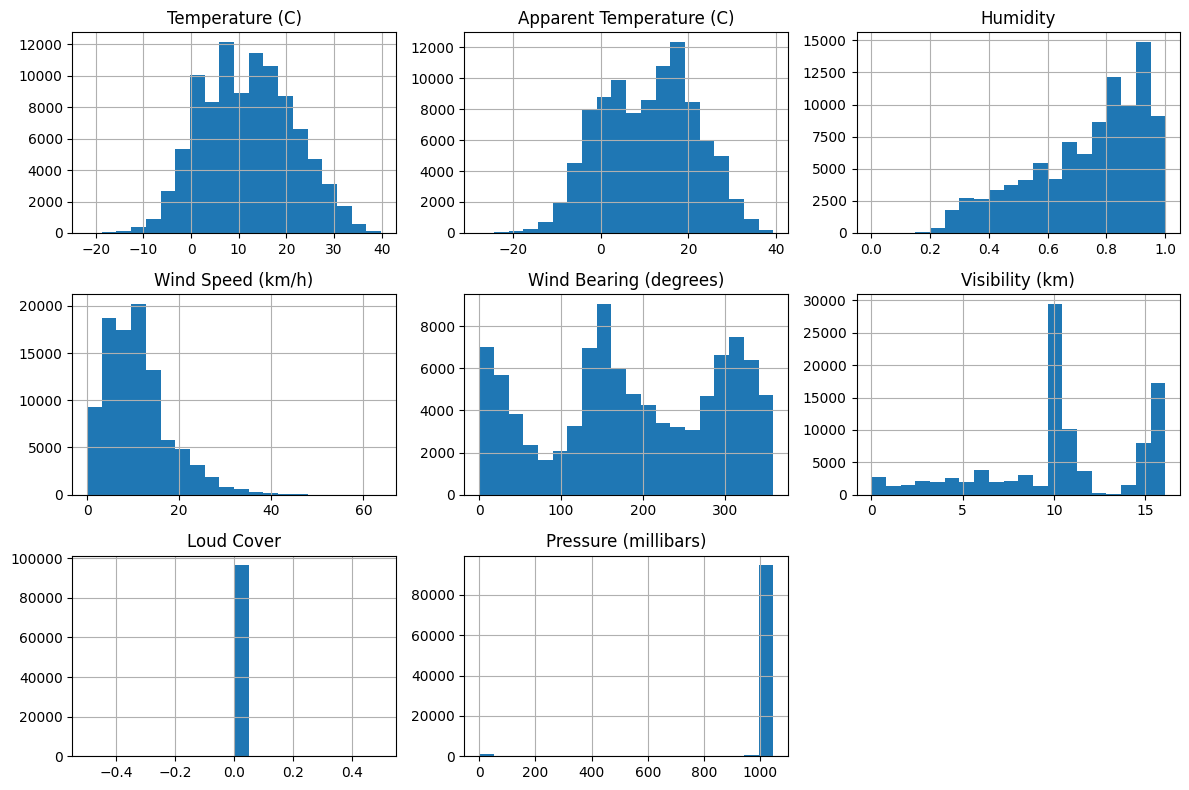

In [27]:
# Histograms
numeric_cols.hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

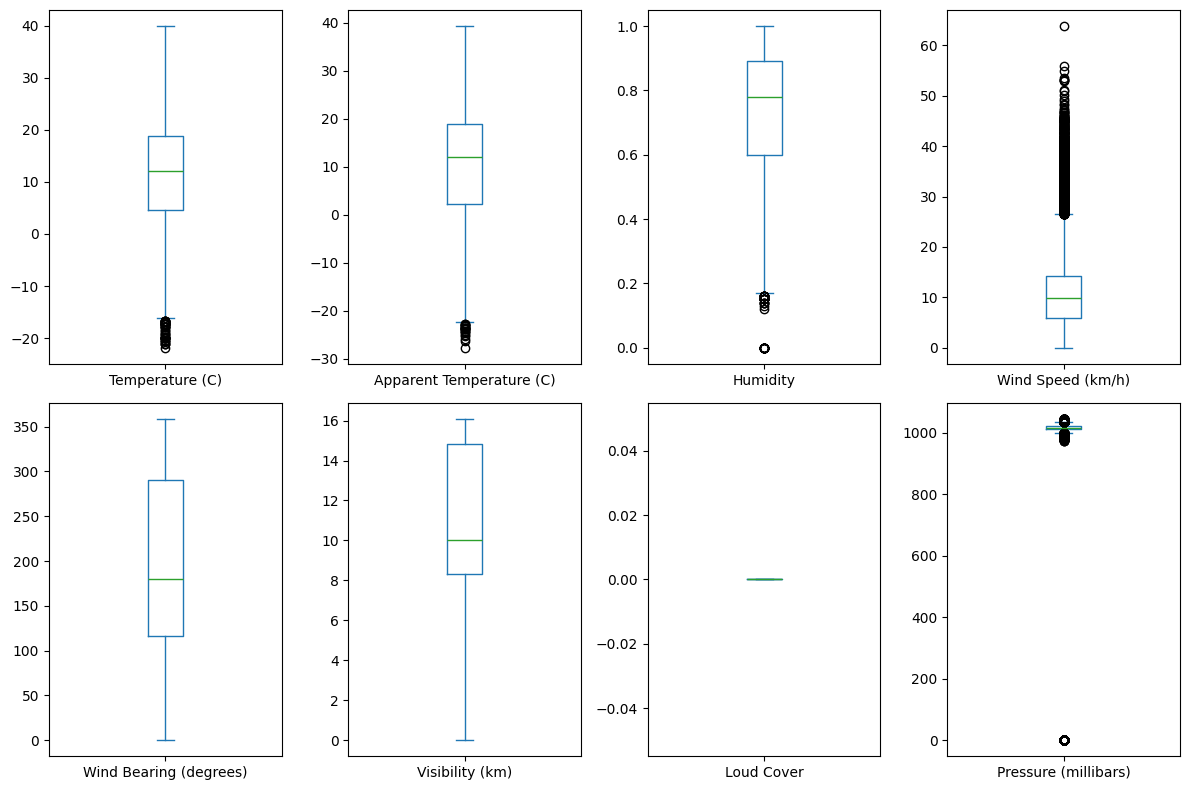

In [28]:
# Box plots
numeric_cols.plot(kind='box', subplots=True, layout=(2, 4), figsize=(12, 8), sharex=False)
plt.tight_layout()
plt.show()

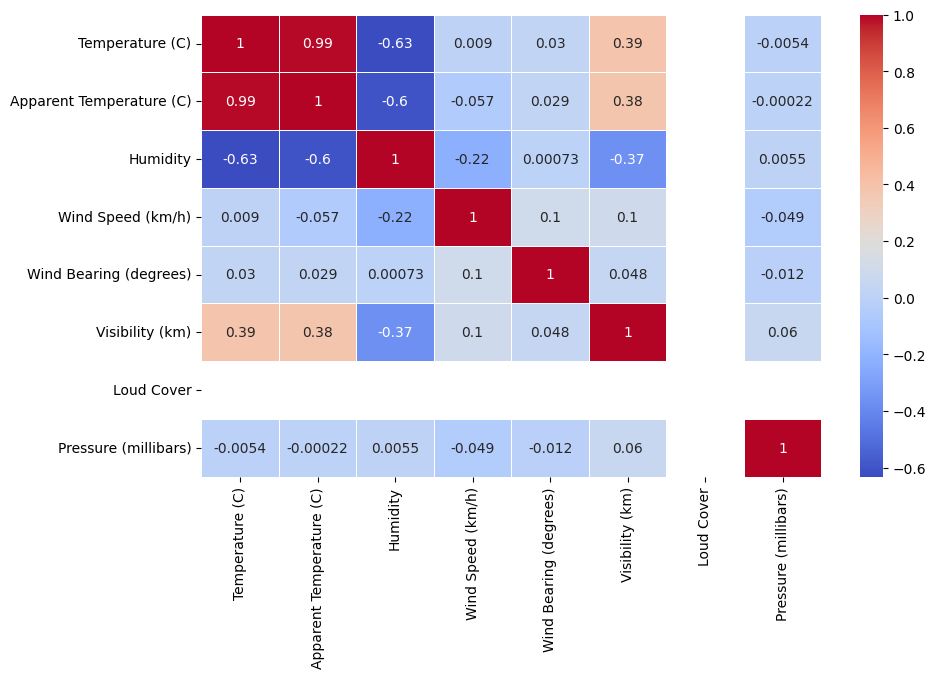

In [29]:
# Correlation matrix and heatmap
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()